## Importing the required libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow.keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback,ModelCheckpoint
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = r"C:\Users\acm\Desktop\ML\leapGestRecog\leapGestRecog"

## CNN-MODEL

In [3]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [4]:
# shuffle the input data
import random
random.shuffle(image_data)

In [5]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[3, 4, 3, ..., 2, 3, 3],
        [4, 3, 3, ..., 3, 3, 3],
        [4, 4, 4, ..., 4, 3, 2],
        ...,
        [4, 4, 5, ..., 3, 3, 4],
        [4, 5, 4, ..., 4, 4, 4],
        [4, 5, 4, ..., 3, 3, 4]], dtype=uint8),
 array([[ 4,  4,  5, ...,  3,  3,  4],
        [ 3,  5,  5, ...,  4,  4,  3],
        [ 4,  5,  6, ...,  4,  4,  5],
        ...,
        [19, 20, 25, ...,  4,  5,  5],
        [17, 19, 23, ...,  4,  4,  4],
        [14, 18, 22, ...,  3,  3,  4]], dtype=uint8),
 array([[6, 7, 7, ..., 4, 5, 4],
        [6, 6, 7, ..., 5, 5, 5],
        [6, 6, 8, ..., 5, 4, 5],
        ...,
        [7, 7, 7, ..., 6, 5, 5],
        [7, 7, 6, ..., 6, 5, 6],
        [6, 7, 6, ..., 6, 6, 6]], dtype=uint8),
 array([[6, 6, 7, ..., 5, 5, 5],
        [5, 7, 8, ..., 5, 5, 5],
        [6, 7, 9, ..., 5, 5, 4],
        ...,
        [8, 7, 8, ..., 7, 6, 6],
        [7, 8, 8, ..., 7, 6, 7],
        [7, 8, 7, ..., 6, 6, 4]], dtype=uint8),
 array([[4, 3, 4, ..., 3, 4, 5],
        [4, 3, 4, ..., 4, 3

In [6]:
label[:10]

[5, 1, 4, 3, 9, 7, 2, 7, 9, 2]

## Plotting the Images

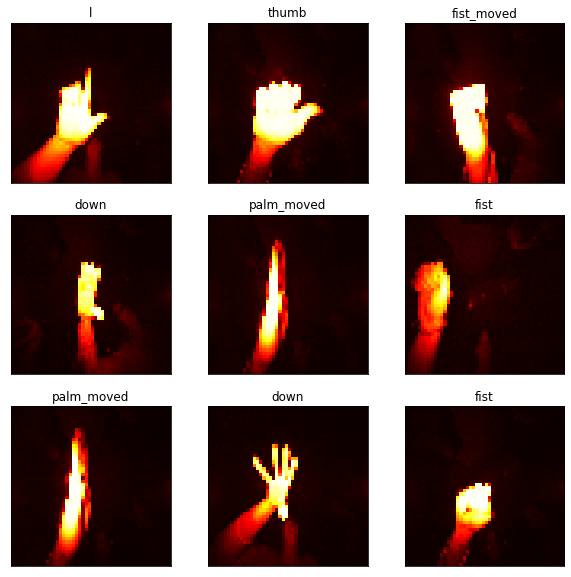

In [7]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [9]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [10]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

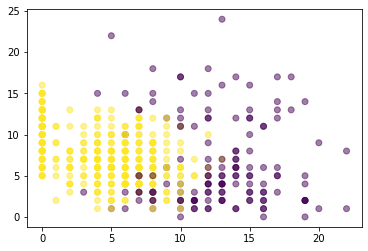

In [11]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [12]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

# One hot encoding

In [13]:
label = tensorflow.keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

# Reshaping the data

In [14]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# Splitting the data into Train and Test

In [15]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50, 1), (18000, 10), (2000, 50, 50, 1), (2000, 10))

In [16]:
model = tensorflow.keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])

# Training the model

In [17]:
model.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
282/282 [==============================] - 63s 220ms/step - loss: 0.3872 - accuracy: 0.8754 - val_loss: 0.0143 - val_accuracy: 0.9970
Epoch 2/10
282/282 [==============================] - 64s 228ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0082 - val_accuracy: 0.9980
Epoch 3/10
282/282 [==============================] - 62s 221ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 4/10
282/282 [==============================] - 62s 220ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9990
Epoch 5/10
282/282 [==============================] - 62s 221ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/10
282/282 [==============================] - 70s 247ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 7/10
282/282 [==============================] - 64s 226ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0069 - val_ac

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

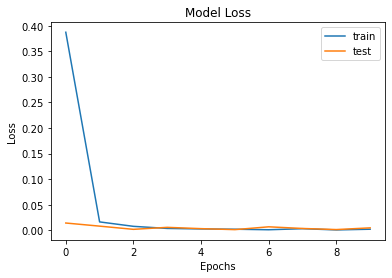

In [19]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

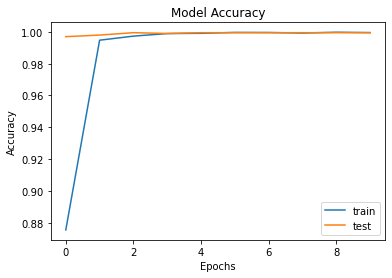

In [20]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 [==============================] - 1s 18ms/step - loss: 0.0049 - accuracy: 0.9995
Test accuracy: 99.95%


In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 [==============================] - 1s 18ms/step - loss: 0.0049 - accuracy: 0.9995
Test accuracy: 99.95%


## ANN-Model

In [5]:
path="C:/Users/acm/Desktop/ML/leapGestRecog/leapGestRecog"
folders=os.listdir(path)
folders=set(folders)

In [9]:
x=[]
z=[]
y=[]
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))

*** 00 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 02 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 05 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 08 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 09 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 01 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 04 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 07 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 03 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
*** 06 ***
08_palm_moved
04_fist_moved
09_c
06_index
01_palm
05_thumb
07_ok
02_l
10_down
03_fist
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [10]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [11]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_data=np.array(x_data)
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.25498139 0.08075452 0.06690615 0.041779  ]
[1529.79553924  860.91952673  783.6320034   619.2388445 ]


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)

In [14]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_further)  

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()
ann_clf.fit(X_train, y_train)
y_pred_ann=ann_clf.predict(X_test)
y_train_score_ann=ann_clf.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_ann, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_ann, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.8505
Train 0.866


Using the hand-gesture recognition dataset, two models were created using CNN and ANN. In CNN, the model was trained using 10 iterations/epochs. The test loss was 0.002/.2% and the validation loss was 0.004/.4%. A decrease in the loss value is evident.The test accuracy and validation accuracy was close to 99.6%. There is a clear increase in accuracy and decrease in the loss value indicating that the model is good.
As a second model, an ANN model from sklearn was called. The test accuracy obtained was 85% while the train accuracy was 86%. Both the accuracy values are lower than the accuracy values obtained using CNN model.
Hence, it can be concluded that the CNN model performed better as compared to ANN.